# Big Picture

The problem is classifying whether an image is a T-shirt (0), trouser (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8), or ankle boot (9). The dataset includes a column of numerical labels and the corresponding row are the pixels for the image. The pixels are gray scaled, each value ranging from 0 to 255. We will create a classifier that can accurately determine each article of clothing. 

# Get and Load Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

https://www.kaggle.com/zalando-research/fashionmnist

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [73]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


# Discover/Visualization and Prep the Data

In [5]:
X, y = df_train.iloc[:,1:785].as_matrix(), df_train['label']

X is the data converted to array/matrix form for easier use. y are the labels associated to that data. To see the data we can image it. Then the corresponding label. 

In [6]:
X.shape

(60000, 784)

In [7]:
y.shape

(60000,)

In [8]:
some_cloth = X[36001]
some_cloth_image = some_cloth.reshape(28,28)

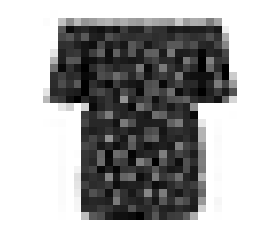

In [9]:
plt.imshow(some_cloth_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [10]:
y[36001]

6

## Split and Shuffle the data

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Test Stochastic Gradient Descent

I want to test a binary classifier on my data. I will use SGD to see if the data is a shirt (6) or not

In [13]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [14]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_cloth])

array([ True])

The model predicted that the image represents a 6 which is true for this case. Next we need to evaluate the models performance

## Evaluate Model using Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\sit

array([0.91685, 0.90655, 0.9074 ])

This means our model is about 92% accurate, which is pretty good. Next I will test the accuracy of classifying not a shirt (6)

In [18]:
from sklearn.base import BaseEstimator

In [19]:
class Never6Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_6_clf = Never6Classifier()

In [21]:
cross_val_score(never_6_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.90045, 0.9006 , 0.89895])

About 90% of the time the model accurately predicts not a shirt

## Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\sit

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_train_6, y_train_pred)

array([[52924,  1076],
       [ 4308,  1692]], dtype=int64)

52,981 of the non 6 images were classified as non-6s while the remaining 1019 were wrongly classified as 6. 3,821 were wrongly classified as non-6s while the remaining 2179 were correctly classified. 

## Precision and Recall

In [26]:
from sklearn.metrics import precision_score, recall_score

In [27]:
precision_score(y_train_6, y_train_pred)

0.611271676300578

In [28]:
recall_score(y_train_6, y_train_pred)

0.282

When the model claims an image is a shirt(6), it is correct about 68% of the time. It only detects 36% of the shirts

## F-1 Score

In [29]:
from sklearn.metrics import f1_score

In [30]:
f1_score(y_train_6, y_train_pred)

0.38594890510948904

I can use this score of 47% to compare to other models and see how they fare

In [31]:
y_scores = sgd_clf.decision_function([some_cloth])
y_scores

array([361866.02050748])

In [32]:
threshold = 0

In [33]:
y_some_cloth_pred = (y_scores < threshold)
y_some_cloth_pred

array([False])

In [34]:
threshold = 200000

In [35]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3, method="decision_function")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\sit

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

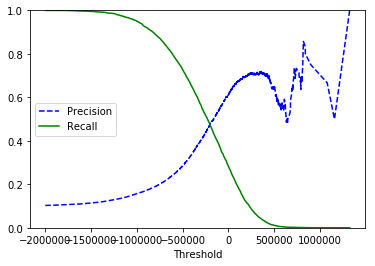

In [40]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## ROC Curve

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

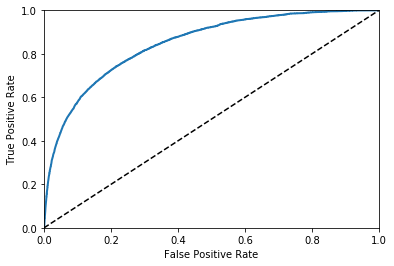

In [44]:
plot_roc_curve(fpr, tpr)
plt.show()

## AUC

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_train_6, y_scores)

0.8478408549382715

A perferct classifier will have a AUC of 1. Having a .8 is not bad meaning the classifier I am using is descent, and provides a good base to compare other classifiers.

# Random Forest Classifier

I will try the RandomForestClassifier to compare against StochasticGradientClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=3, method="predict_proba")

I need to use the scores to plot the ROC curve, not probability. So I will use the positive class's probablity as the score

In [49]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_6, y_scores_forest)

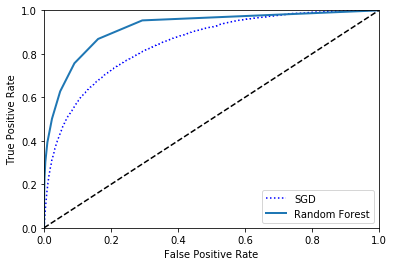

In [50]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

RFClassifier ROC curve looks better than SGDClassifier. 

In [51]:
roc_auc_score(y_train_6, y_scores_forest)

0.9204849845679013

# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree_clf = DecisionTreeClassifier(random_state=42)
y_probas_tree = cross_val_predict(tree_clf, X_train, y_train_6, cv=3, method="predict_proba")

In [54]:
y_scores_tree = y_probas_tree[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train_6, y_scores_tree)

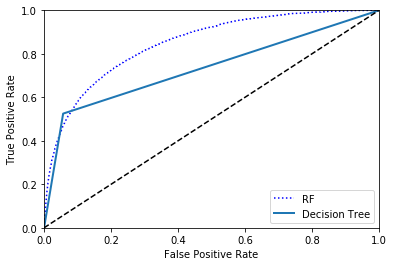

In [55]:
plt.plot(fpr, tpr, "b:", label="RF")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plt.legend(loc="lower right")
plt.show()

In [56]:
roc_auc_score(y_train_6, y_scores_tree)

0.7341111111111112

The Decision Tree classifier does significantly less than SGD and RF Classifiers.

# Multiclass Classification

Due to Sci-kitLearn, running a multiclass algorithm will result in one-versus-all. So lets try it on the SGDClassifier

## SGD Classifier

In [57]:
sgd_clf.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [58]:
sgd_clf.predict([some_cloth])

array([6], dtype=int64)

I can see why the classifier would predict a 0(T-shirt) but it was incorrect in this case.

In [59]:
some_cloth_scores = sgd_clf.decision_function([some_cloth])

In [60]:
some_cloth_scores

array([[  301566.32752233, -1226041.86191933, -1295917.22005464,
         -784217.1563482 , -1092119.3431964 , -2124445.11195119,
          361866.02050748, -2423442.15106936,  -915832.00539801,
        -2476667.47137652]])

In [61]:
np.argmax(some_cloth_scores)

6

In [62]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [63]:
sgd_clf.classes_[6]

6

Now lets try on the Random Forest Classifier since it was shown to be better than the SGD.

## RFClassifier

In [64]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
forest_clf.predict([some_cloth])

array([6], dtype=int64)

As suspected RFClassifier got it right!

Due to the poor performance of DecisionTreeClassifier, I won't even mess with it.

# Linear Regression (Before Regularization)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [67]:
lin_reg = LinearRegression()

In [68]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lin_reg.predict([some_cloth])

array([3.42136197])

# Ridge Regression (After Regularization)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [ ]:
ridge_reg.fit(X_train, y_train)

In [ ]:
ridge_reg.predict([some_cloth])

# Short Memo

Based on all of the results we can clearly see as displayed by the ROC curve that Random Forest Classifier is the better, more accurate classifier against stochastic decsent and decision tree. The problem is fairly simple and if we give it future instances based solely on pixels, we can determine the type of clothing on a 91% accuracy rate. 

# Future

The data we have is pretty good and sufficient. It is important to use pixels on a gray scale if the company wishes to predict future articles of clothing. It should we